In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convolve(image_path, kernel):
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale
    image_array = np.array(original_image)

    image_height, image_width = image_array.shape
    kernel_height, kernel_width = kernel.shape

    # Manually pad the image with zeros
    pad_size=1
    padded_image = np.zeros((image_height + 2 * pad_size, image_width + 2 * pad_size), dtype=image_array.dtype)
    padded_image[pad_size:pad_size + image_height, pad_size:pad_size + image_width] = image_array

    print("padded",padded_image.shape)

    # Initialize the result matrix
    result = np.zeros((image_height, image_width), dtype=np.float64)

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            neighborhood = padded_image[i:i+kernel_height, j:j+kernel_width]
            val = np.sum(neighborhood * kernel)
            result[i][j] = val

    print("result",result.shape)

    return result


padded (233, 208)
result (231, 206)


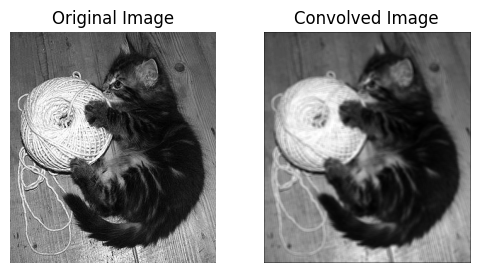

In [3]:
mean = (1/9) * np.array([[1,1,1],
                       [1,1,1],
                       [1,1,1]])


# Example usage
image_path = 'kitty.bmp'
mean_convolved_array = convolve(image_path,mean)
# Convert to the appropriate data type for saving (e.g., 'L' for 8-bit)
mean_convolved_image = Image.fromarray(mean_convolved_array.astype(np.uint8), mode='L')

mean_convolved_image.save('mean_kitty.bmp')
original_image = Image.open(image_path)

# Display the images side by side using matplotlib
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.show()

In [4]:
def calculate_gradients(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2], 
                        [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, -1], 
                        [0, 0, 0], 
                        [1, 2, 1]])
    
    # Convolve the image with the Sobel kernels using manual convolution
    gradient_x = convolve(image, sobel_x)
    min_x = gradient_x.min()
    max_x = gradient_x.max()
    normalized_x = ((gradient_x - min_x) / (max_x - min_x) * 255).astype(np.uint8)
        
    gradient_y = convolve(image, sobel_y)
    min_y = gradient_y.min()
    max_y = gradient_y.max()
    normalized_y = ((gradient_y - min_y) / (max_y - min_y) * 255).astype(np.uint8)


    # Combine the gradients
    gradient_combined = np.sqrt(gradient_x**2 + gradient_y**2)
    min_combined = gradient_combined.min()
    max_combined = gradient_combined.max()
    normalized_combined = ((gradient_combined - min_combined) / 
                           (max_combined - min_combined) * 255).astype(np.uint8)

    return [gradient_x, gradient_y, normalized_combined]

padded (233, 208)
result (231, 206)
padded (233, 208)
result (231, 206)


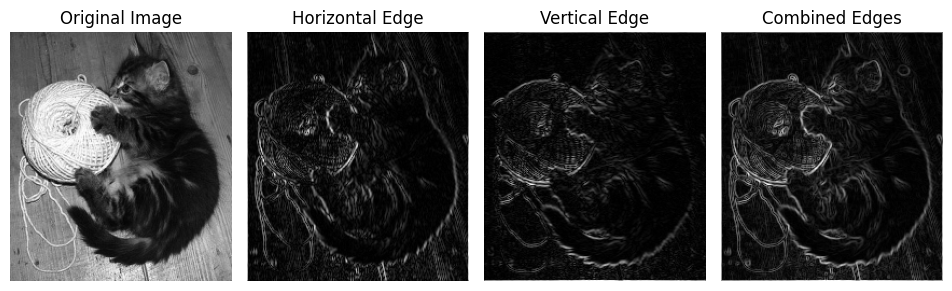

In [5]:
results = calculate_gradients("kitty.bmp")

image_horizontal = results[0]
image_vertical = results[1]
image_combined = results[2]

# Load the original image
original_image = Image.open("kitty.bmp").convert('L')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the horizontal edge image
plt.subplot(1, 5, 2)
# plt.imshow(mean_image_horizontal, cmap='gray')
plt.imshow(np.abs(image_horizontal), cmap='gray')
plt.title('Horizontal Edge')
plt.axis('off')

# Display the vertical edge image
plt.subplot(1, 5, 3)
# plt.imshow(mean_image_vertical, cmap='gray')
plt.imshow(np.abs(image_vertical), cmap='gray')
plt.title('Vertical Edge')
plt.axis('off')

# Display the combined edge image
plt.subplot(1, 5, 4)
plt.imshow(image_combined, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
results = calculate_gradients("mean_kitty.bmp")

mean_image_horizontal = results[0]
mean_image_vertical = results[1]
mean_image_combined = results[2]
# mean_x_normalised = results[3]
# mean_y_normalised = results[4]

padded (233, 208)
result (231, 206)
padded (233, 208)
result (231, 206)


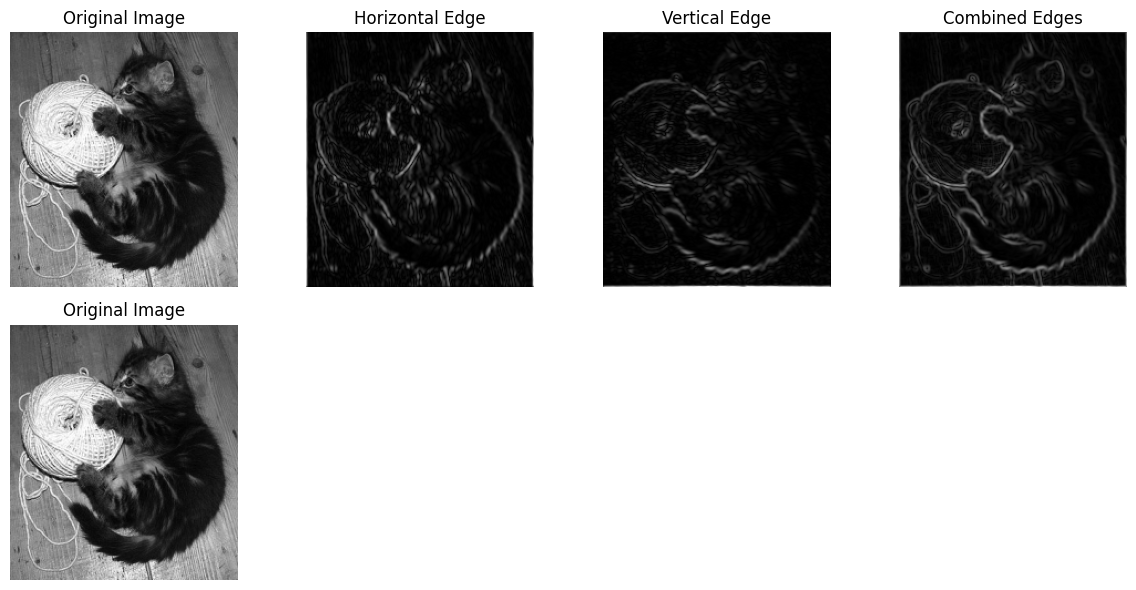

In [7]:
# Load the original image
original_image = Image.open("kitty.bmp").convert('L')

# Display the original image
plt.figure(figsize=(12, 6))
plt.subplot(2, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the horizontal edge image
plt.subplot(2, 4, 2)
# plt.imshow(mean_image_horizontal, cmap='gray')
plt.imshow(np.abs(mean_image_horizontal), cmap='gray')
plt.title('Horizontal Edge')
plt.axis('off')

# Display the vertical edge image
plt.subplot(2, 4, 3)
# plt.imshow(mean_image_vertical, cmap='gray')
plt.imshow(np.abs(mean_image_vertical), cmap='gray')
plt.title('Vertical Edge')
plt.axis('off')

# Display the combined edge image
plt.subplot(2, 4, 4)
plt.imshow(mean_image_combined, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

# Display the original image
plt.subplot(2, 4, 5)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# # Display the horizontal edge image
# plt.subplot(2, 4, 6)
# # plt.imshow(mean_image_horizontal, cmap='gray')
# plt.imshow(np.abs(mean_x_normalised), cmap='gray')
# plt.title('Horizontal Edge')
# plt.axis('off')

# # Display the vertical edge image
# plt.subplot(2, 4, 7)
# # plt.imshow(mean_image_vertical, cmap='gray')
# plt.imshow(np.abs(mean_y_normalised), cmap='gray')
# plt.title('Vertical Edge')
# plt.axis('off')

# # Display the combined edge image
# plt.subplot(2, 4, 8)
# plt.imshow(np.abs(mean_image_combined), cmap='gray')
# plt.title('Combined Edges')
# plt.axis('off')

plt.tight_layout()
plt.show()



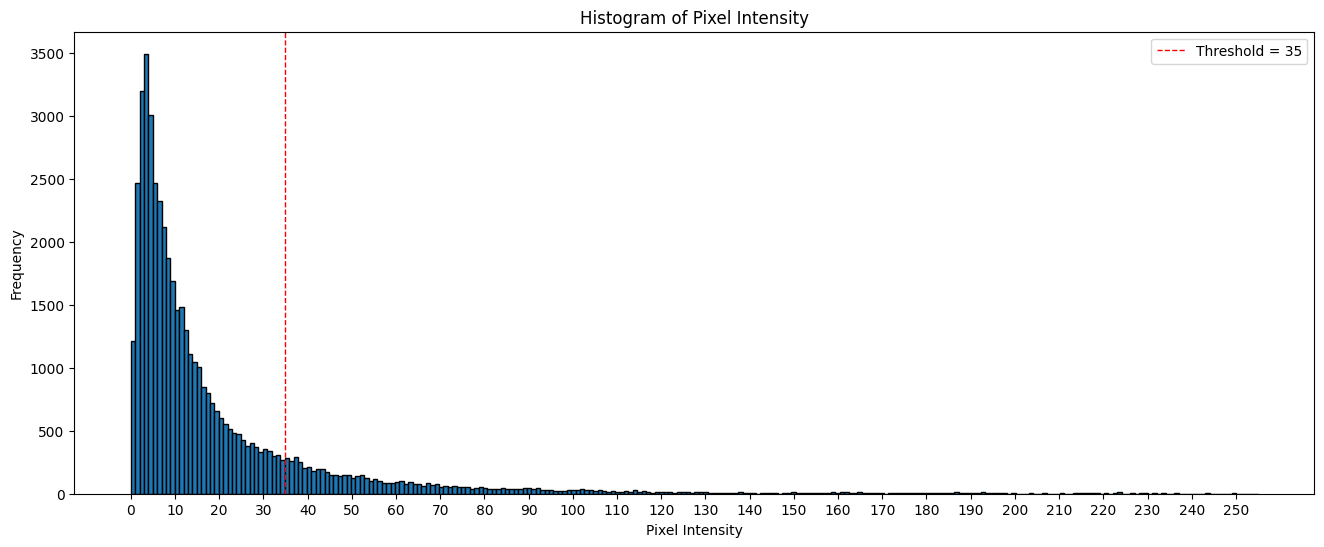

In [8]:
# Flatten the image array to 1D
mean_flat_normalized_combined = mean_image_combined.flatten()

# print(mean_flat_normalized_combined)

# Create a histogram
plt.figure(figsize=(16, 6))
plt.hist(mean_flat_normalized_combined, bins=256, edgecolor='black',)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity')
# Set x-axis ticks at intervals of 25
plt.xticks(np.arange(0, 256, 10))
# plt.grid()
plt.axvline(x=35, color='red', linestyle='dashed', linewidth=1, label='Threshold = 35')
plt.legend()
plt.savefig('mean_hist.png',bbox_inches='tight')

# Show the histogram
plt.show()


In [9]:
def apply_threshold(image, threshold):
    major_edges = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > threshold:
                major_edges[i,j] = image[i,j]
    return major_edges

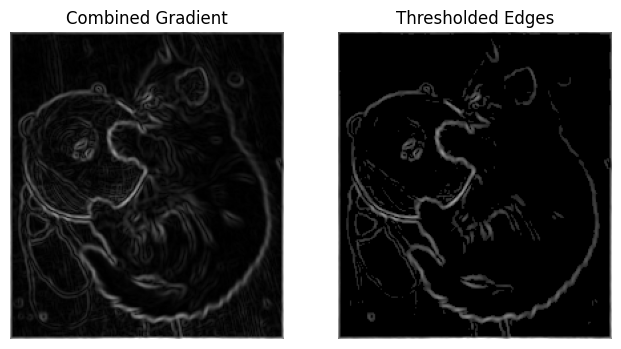

In [10]:
mean_major_edges = apply_threshold(mean_image_combined, 35)
# mean_major_edges = Image.fromarray(mean_major_edges.astype(np.uint8), mode='L')
# mean_major_edges.save('mean_threshold.bmp')

# Display the major edges
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(mean_image_combined, cmap='gray')
plt.title('Combined Gradient')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_major_edges, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


plt.show()

NEXT IS GAUSSIAN

padded (233, 208)
result (231, 206)


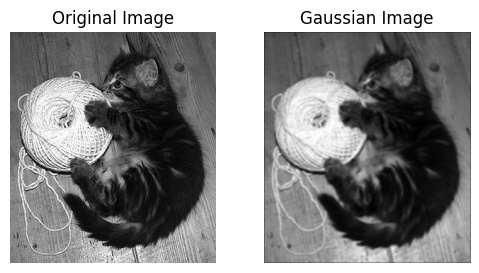

In [11]:
#gaussian
gaussian = (1 / 16) * np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]])

# Example usage
image_path = 'kitty.bmp'
gaussian_convolved_array = convolve(image_path,gaussian)
# Convert to the appropriate data type for saving (e.g., 'L' for 8-bit)
gaussian_convolved_image = Image.fromarray(gaussian_convolved_array.astype(np.uint8), mode='L')

gaussian_convolved_image.save('gaussian_kitty.bmp')
original_image = Image.open(image_path)

# Display the images side by side using matplotlib
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gaussian_convolved_image, cmap='gray')
plt.title('Gaussian Image')
plt.axis('off')

plt.show()

In [12]:
results = calculate_gradients('gaussian_kitty.bmp')

gaussian_image_horizontal = results[0]
gaussian_image_vertical = results[1]
gaussian_image_combined = results[2]

padded (233, 208)
result (231, 206)
padded (233, 208)
result (231, 206)


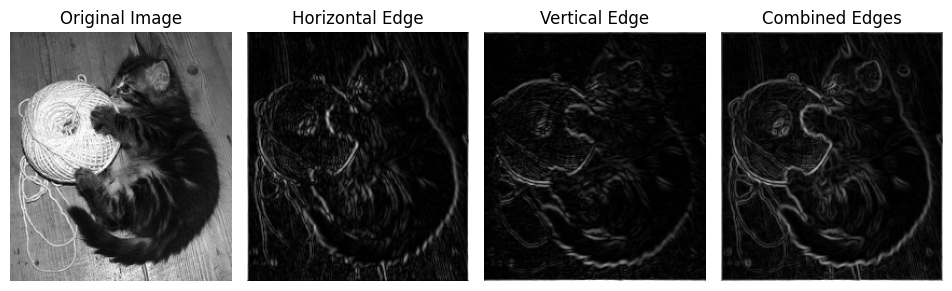

In [13]:
# Load the original image
original_image = Image.open("kitty.bmp").convert('L')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the horizontal edge image
plt.subplot(1, 5, 2)
# plt.imshow(gaussian_image_horizontal, cmap='gray')
plt.imshow(np.abs(gaussian_image_horizontal), cmap='gray')
plt.title('Horizontal Edge')
plt.axis('off')

# Display the vertical edge image
plt.subplot(1, 5, 3)
# plt.imshow(gaussian_image_vertical, cmap='gray')
plt.imshow(np.abs(gaussian_image_vertical), cmap='gray')
plt.title('Vertical Edge')
plt.axis('off')

# Display the combined edge image
plt.subplot(1, 5, 4)
plt.imshow(gaussian_image_combined, cmap='gray')
plt.title('Combined Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

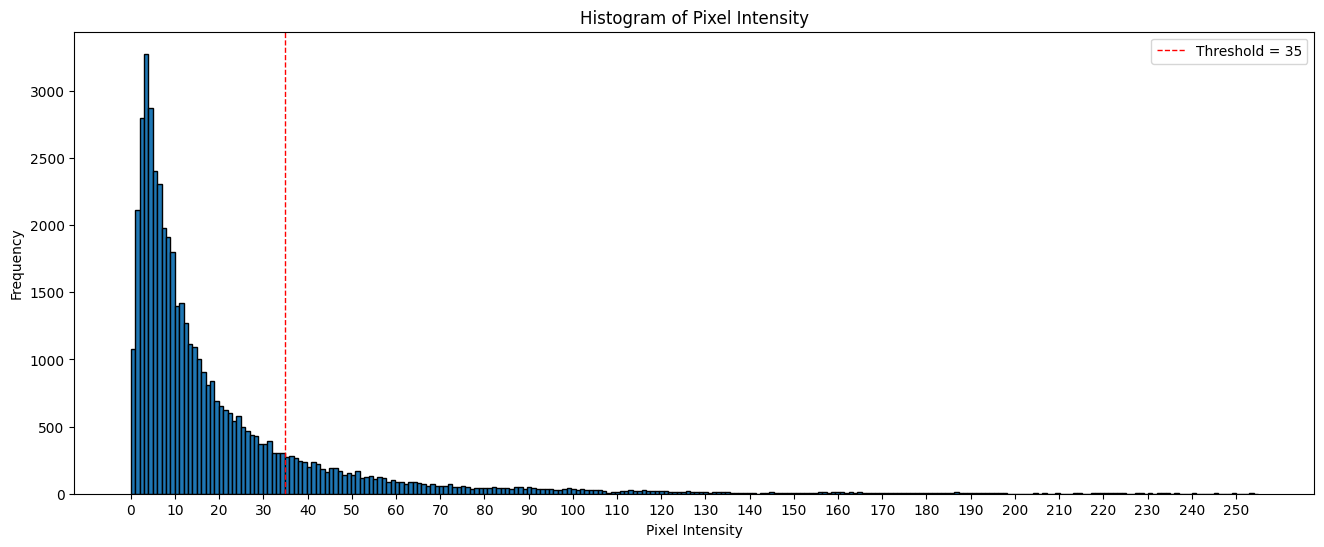

In [14]:
# Flatten the image array to 1D
gaussian_flat_normalized_combined = gaussian_image_combined.flatten()

# print(gaussian_flat_normalized_combined)

# Create a histogram
plt.figure(figsize=(16, 6))
plt.hist(gaussian_flat_normalized_combined, bins=256, edgecolor='black',)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity')
# Set x-axis ticks at intervals of 25
plt.xticks(np.arange(0, 256, 10))
# plt.grid()
plt.axvline(x=35, color='red', linestyle='dashed', linewidth=1, label='Threshold = 35')
plt.legend()

# Show the histogram

plt.savefig('gaussian_hist.png',bbox_inches='tight')
plt.show()

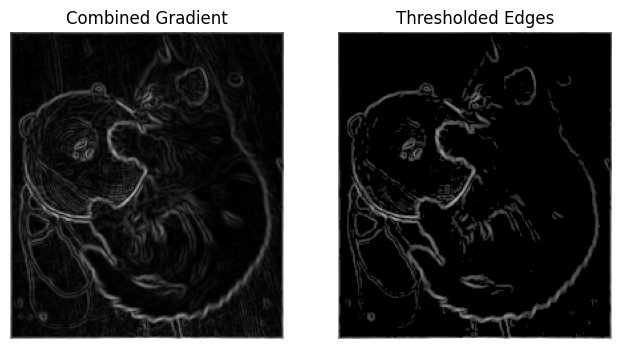

In [31]:
gaussian_major_edges = apply_threshold(gaussian_image_combined, 35)
# gaussian_major_edges = Image.fromarray(gaussian_major_edges.astype(np.uint8), mode='L')
# gaussian_major_edges.save('gaussian_threshold.bmp')

# Display the major edges
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gaussian_image_combined, cmap='gray')
plt.title('Combined Gradient')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_major_edges, cmap='gray')
plt.title('Thresholded Edges')
plt.axis('off')


plt.show()

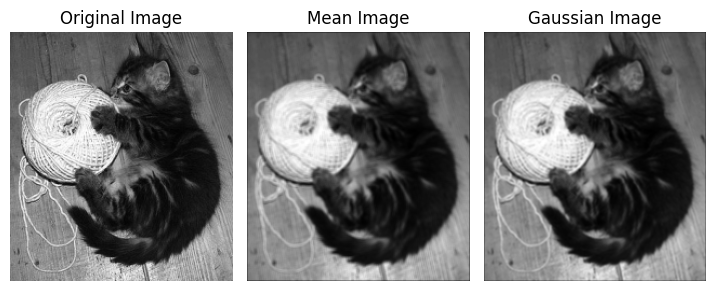

In [16]:
original_image = Image.open("kitty.bmp").convert('L')
mean_image = Image.open("mean_kitty.bmp").convert('L')
gaussian_image = Image.open("gaussian_kitty.bmp").convert('L')

# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display the horizontal edge image
plt.subplot(1, 5, 2)
plt.imshow(mean_image, cmap='gray')
plt.title('Mean Image')
plt.axis('off')

# Display the vertical edge image
plt.subplot(1, 5, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Gaussian Image')
plt.axis('off')

plt.tight_layout()

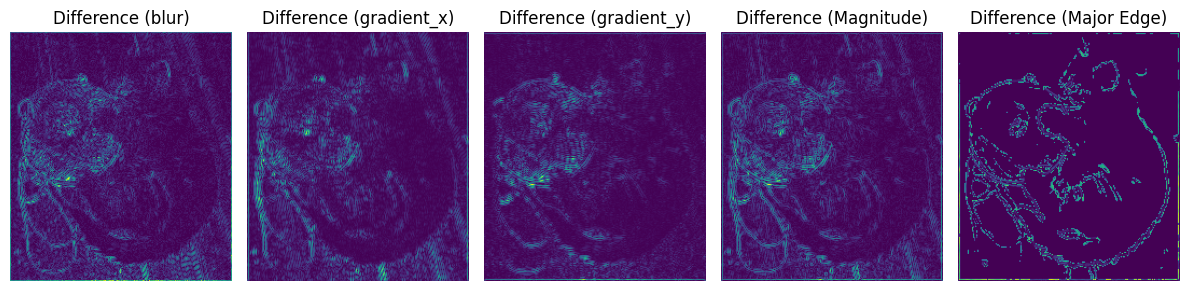

In [17]:
original_image = np.array(Image.open("kitty.bmp").convert('L'))
mean_image = np.array(Image.open("mean_kitty.bmp").convert('L'))
mean_image_horizontal = np.array(mean_image_horizontal)
mean_image_vertical = np.array(mean_image_vertical)
mean_image_combined = np.array(mean_image_combined)
gaussian_image = np.array(Image.open("gaussian_kitty.bmp").convert('L'))
gaussian_image_horizontal = np.array(gaussian_image_horizontal)
gaussian_image_vertical = np.array(gaussian_image_vertical)
gaussian_image_combined = np.array(gaussian_image_combined)


# Display the first 5 images in the first row
plt.figure(figsize=(12, 6))


plt.subplot(1, 5, 1)
plt.imshow(np.abs(mean_image.astype(np.int32) - gaussian_image.astype(np.int32)))
plt.title('Difference (blur)')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(np.abs(mean_image_horizontal.astype(np.int32) - gaussian_image_horizontal.astype(np.int32)))
plt.title('Difference (gradient_x)')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(np.abs(mean_image_vertical.astype(np.int32) - gaussian_image_vertical.astype(np.int32)))
plt.title('Difference (gradient_y)')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(np.abs(mean_image_combined.astype(np.int32) - gaussian_image_combined.astype(np.int32)))
plt.title('Difference (Magnitude)')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(np.abs(mean_major_edges.astype(np.int32) - gaussian_major_edges.astype(np.int32)))
plt.title('Difference (Major Edge)')
plt.axis('off')

plt.tight_layout()
plt.show()


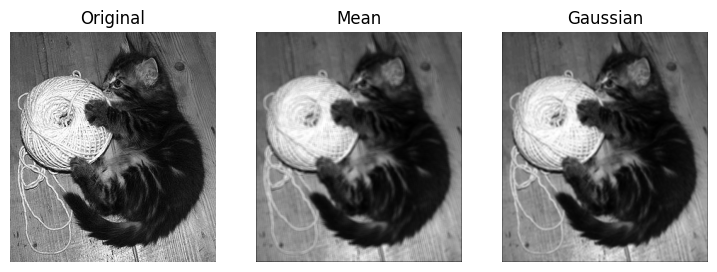

In [18]:
original_image = np.array(Image.open("kitty.bmp").convert('L'))
mean_image = np.array(Image.open("mean_kitty.bmp").convert('L'))
mean_image_horizontal = np.array(mean_image_horizontal)
mean_image_vertical = np.array(mean_image_vertical)
mean_image_combined = np.array(mean_image_combined)
gaussian_image = np.array(Image.open("gaussian_kitty.bmp").convert('L'))
gaussian_image_horizontal = np.array(gaussian_image_horizontal)
gaussian_image_vertical = np.array(gaussian_image_vertical)
gaussian_image_combined = np.array(gaussian_image_combined)


diff_x = np.abs(mean_image_horizontal.astype(np.int32) - gaussian_image_horizontal.astype(np.int32))

diff_y = np.abs(mean_image_vertical.astype(np.int32) - gaussian_image_vertical.astype(np.int32))

diff_combined = np.abs(mean_image_combined.astype(np.int32) - gaussian_image_combined.astype(np.int32))

# Display the major edges
plt.figure(figsize=(9, 4))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_image, cmap="gray")
plt.title('Mean')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_image, cmap="gray")
plt.title('Gaussian')
plt.axis('off')

plt.savefig('convolution.png',bbox_inches='tight')

plt.show()


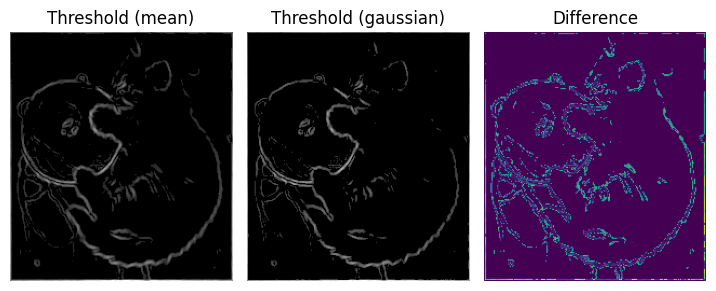

In [19]:


# Display the original image
plt.figure(figsize=(12, 4))
plt.subplot(1, 5, 1)
plt.imshow(mean_major_edges, cmap='gray')
plt.title('Threshold (mean)')
plt.axis('off')

# Display the horizontal edge image
plt.subplot(1, 5, 2)
plt.imshow(gaussian_major_edges, cmap='gray')
plt.title('Threshold (gaussian)')
plt.axis('off')

# Display the vertical edge image
plt.subplot(1, 5, 3)
plt.imshow(np.abs(mean_major_edges.astype(np.int32) - gaussian_major_edges.astype(np.int32)))
plt.title('Difference')
plt.axis('off')

plt.savefig('major_edges.png',bbox_inches='tight')

plt.tight_layout()

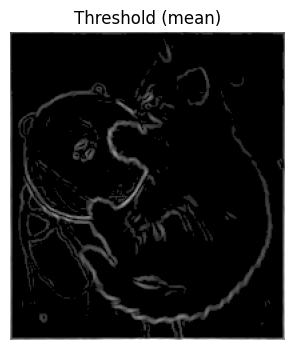

In [20]:
# Display the original image
plt.figure(figsize=(12, 4))
plt.imshow(mean_major_edges, cmap='gray')
plt.title('Threshold (mean)')
plt.axis('off')
plt.savefig('mean_major_edges.png',bbox_inches='tight')
plt.show()



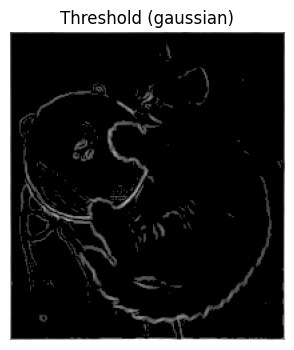

In [21]:
# Display the horizontal edge image
plt.figure(figsize=(12, 4))
plt.imshow(gaussian_major_edges, cmap='gray')
plt.title('Threshold (gaussian)')
plt.axis('off')
plt.savefig('gaussian_major_edges.png',bbox_inches='tight')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

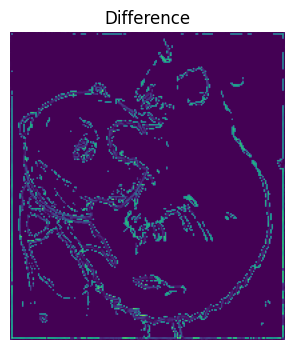

In [22]:
# Display the vertical edge image
plt.figure(figsize=(12, 4))
plt.imshow(np.abs(mean_major_edges.astype(np.int32) - gaussian_major_edges.astype(np.int32)))
plt.title('Difference')
plt.axis('off')

plt.savefig('diff_major_edges.png',bbox_inches='tight')
plt.show

In [23]:
print(original_image.shape)
print(mean_convolved_array.shape)

(231, 206)
(231, 206)


<function matplotlib.pyplot.show(close=None, block=None)>

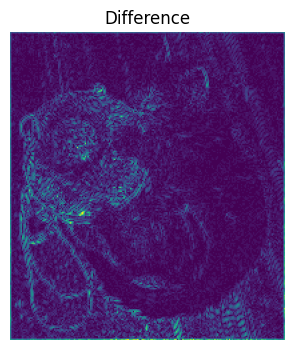

In [24]:
# Display the vertical edge image
plt.figure(figsize=(12, 4))
plt.imshow(np.abs(mean_convolved_array.astype(np.int32) - gaussian_convolved_array.astype(np.int32)))
plt.title('Difference')
plt.axis('off')

plt.savefig('blur_diff.png',bbox_inches='tight')
plt.show